In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
Data = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
Data

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [5]:
Data.isnull()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13490599,False,False,False,False,False,False,False
13490600,False,False,False,False,False,False,False
13490601,False,False,False,False,False,False,False
13490602,False,False,False,False,False,False,False


In [6]:
Data.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [7]:
Data.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [9]:
Data.tail(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [10]:
Data.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [26]:
#menfilter data periode 2011 sd 2016
Data_filter=Data[Data['year'] > 2010]
Data_filter.head()


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5


In [30]:
#menpivot data untuk melihat tren kasus pertahun
Data_pivot = Data_filter.pivot_table('value',index='major_category',columns='year',aggfunc={'value':'sum'})
Data_pivot.head()

year,2011,2012,2013,2014,2015,2016
major_category,,,,,,
Burglary,93315,93392,87222,76053,70489,68285
Criminal Damage,70914,62158,56206,59279,62976,64071
Drugs,57550,51776,50278,44435,39785,38914
Fraud or Forgery,0,0,0,0,0,0
Other Notifiable Offences,10264,10675,10811,13037,14229,15809


In [36]:
#mentranspose data pivot
Data_pivotT=Data_pivot.transpose()
Data_pivotT.head()

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740


<AxesSubplot:xlabel='year'>

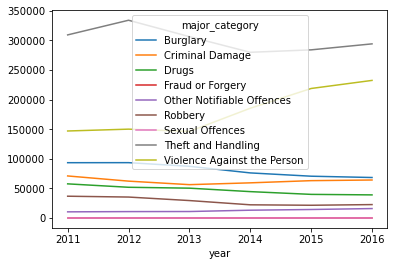

In [37]:
#membuat tren kasus
Data_pivotT.plot()

Text(0.5, 0, 'Tahun')

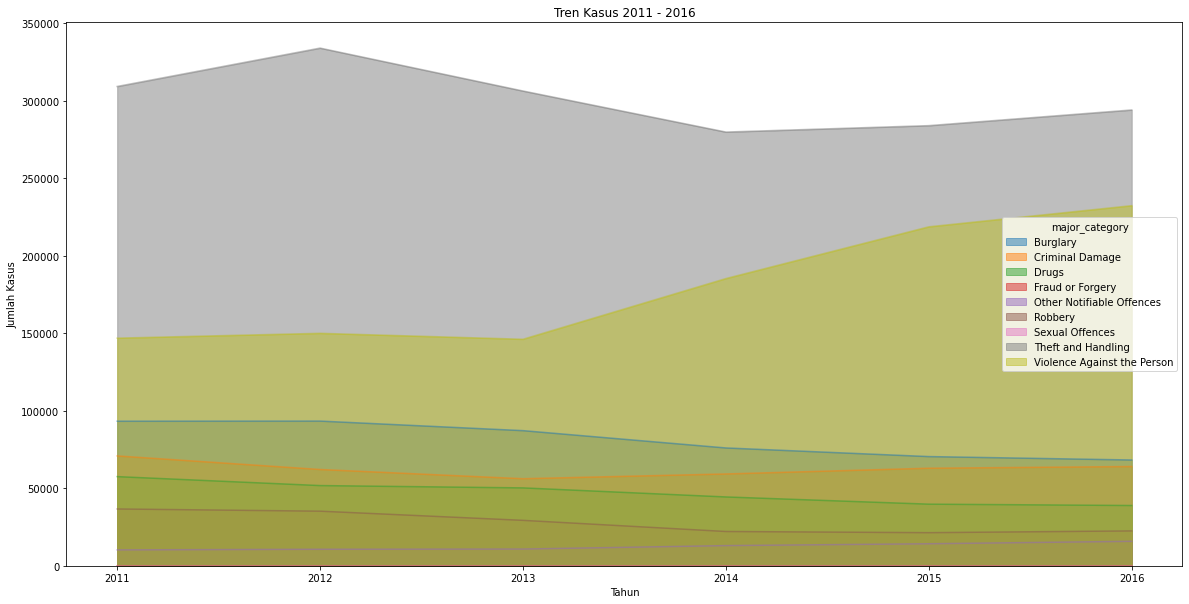

In [140]:
#membuat tren kasus
Data_pivotT.plot(kind='area', stacked=False, figsize=(20,10))
plt.title('Tren Kasus 2011 - 2016')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Tahun')


In [41]:
Data_filter16=Data[Data['year'] == 2016]
Data_filter16.head()


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2


In [83]:
#menpivot data untuk melihat tren kasus pertahun / melihat jumlah kasus 2016 by table
Data_pivot2 = Data_filter16.pivot_table('value',index='borough',columns='major_category',aggfunc={'value':'sum'})
Data_pivot2

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
borough,,,,,,,,,
Barking and Dagenham,1287.0,1949.0,919.0,0.0,378.0,534.0,0.0,5607.0,6067.0
Barnet,3402.0,2183.0,906.0,0.0,499.0,464.0,0.0,9731.0,7499.0
Bexley,1123.0,1673.0,646.0,0.0,294.0,209.0,0.0,4392.0,4503.0
Brent,2631.0,2280.0,2096.0,0.0,536.0,919.0,0.0,9026.0,9205.0
Bromley,2214.0,2202.0,728.0,0.0,417.0,369.0,0.0,7584.0,6650.0
Camden,2652.0,1935.0,1493.0,0.0,490.0,899.0,0.0,14088.0,7626.0
City of London,2.0,2.0,10.0,NaN,6.0,4.0,NaN,129.0,25.0
Croydon,2738.0,3219.0,1367.0,0.0,718.0,1139.0,0.0,9229.0,10302.0
Ealing,2492.0,2562.0,1355.0,0.0,613.0,669.0,0.0,10040.0,9396.0


Text(0.5, 0, 'Borough')

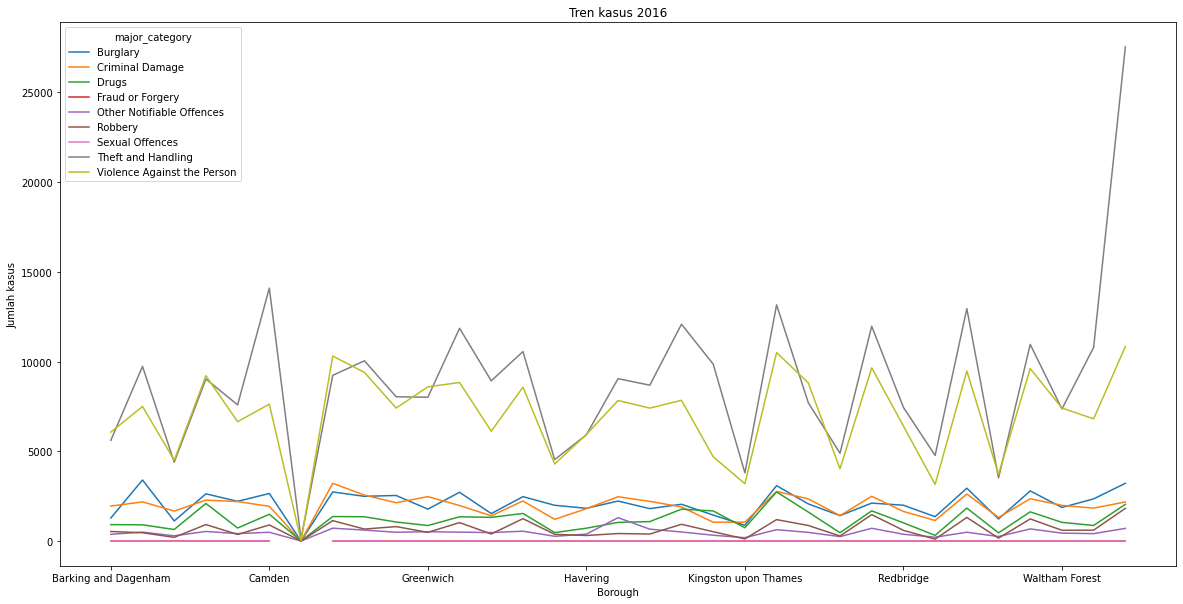

In [84]:
#membuat jumlah kasus 2016 

Data_pivot2.plot(kind='line',figsize=(20,10))
plt.title('Tren kasus 2016')
plt.ylabel('Jumlah kasus')
plt.xlabel('Borough')

In [101]:
#menpivot data persebaran kasus major per borough
Data_pivot2 = Data_filter16.pivot_table('value',index='borough',columns='year',aggfunc={'value':'sum'})
Data_pivot2

year,2016
borough,
Barking and Dagenham,16741
Barnet,24684
Bexley,12840
Brent,26693
Bromley,20164
Camden,29183
City of London,178
Croydon,28712
Ealing,27127


<AxesSubplot:ylabel='borough'>

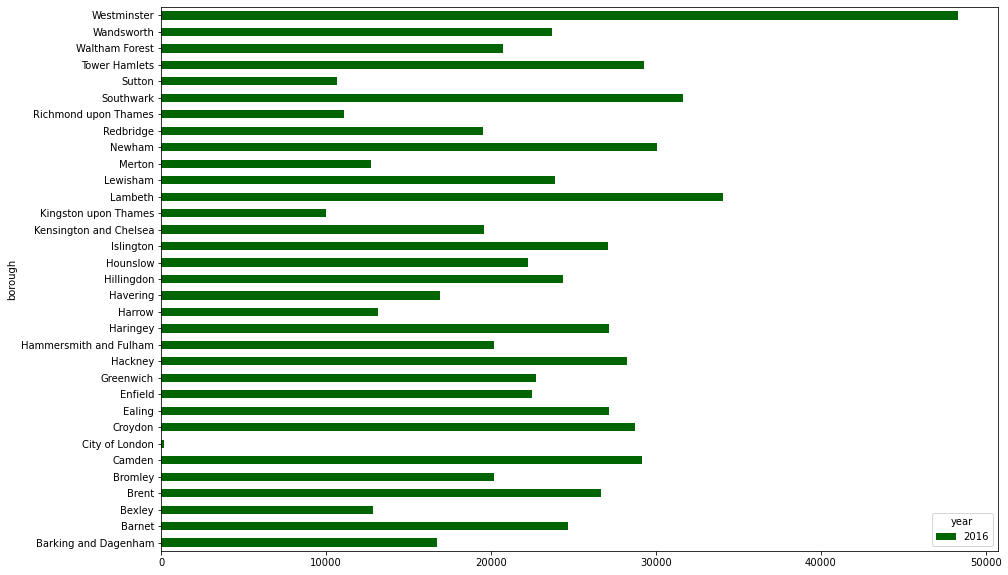

In [105]:
#jumlah data persebaran kasus major per borough
Data_pivot2.plot(kind='barh',color='darkgreen', figsize=(15,10))

In [121]:
Data_filter_1=Data_filter16[Data_filter16['borough'] == 'Westminster']
Data_filter_1



,lsoa_code,borough,major_category,minor_category,value,year,month
227,E01004750,Westminster,Theft and Handling,Theft From Motor Vehicle,6,2016,8
700,E01004659,Westminster,Violence Against the Person,Common Assault,1,2016,2
798,E01004740,Westminster,Violence Against the Person,Offensive Weapon,0,2016,3
972,E01004742,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,0,2016,11
1538,E01033599,Westminster,Burglary,Burglary in a Dwelling,0,2016,4
...,...,...,...,...,...,...,...
13489719,E01033594,Westminster,Theft and Handling,Theft/Taking Of Motor Vehicle,2,2016,12
13489732,E01004647,Westminster,Violence Against the Person,Offensive Weapon,0,2016,9
13490109,E01032513,Westminster,Violence Against the Person,Common Assault,0,2016,11
13490133,E01004718,Westminster,Theft and Handling,Other Theft,2,2016,4


In [129]:
Data_Pie_Westminster = Data_filter_1.groupby('major_category')['value'].sum()
Data_Pie_Westminster

major_category
Burglary                        3218
Criminal Damage                 2179
Drugs                           2049
Fraud or Forgery                   0
Other Notifiable Offences        708
Robbery                         1822
Sexual Offences                    0
Theft and Handling             27520
Violence Against the Person    10834
Name: value, dtype: int64

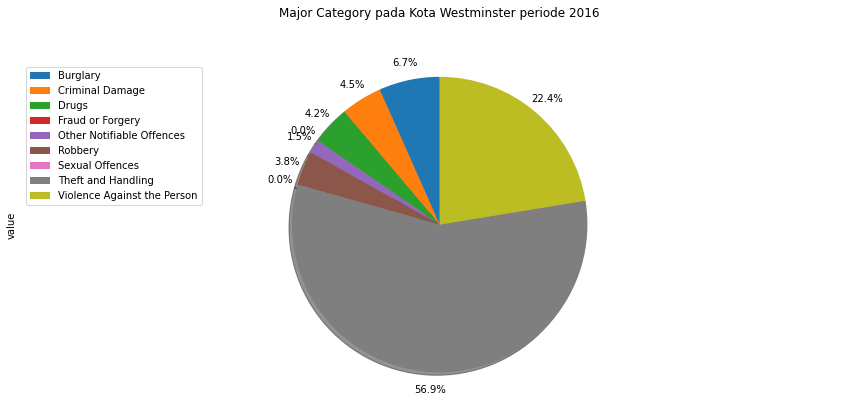

In [141]:
#chart kasus major pada borough Westminster
Data_Pie_Westminster.groupby(['major_category']).sum().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,)

plt.title('Major Category pada Kota Westminster periode 2016', y=1.12) 
plt.axis('equal') 
plt.legend(labels=Data_Pie_Westminster.index, loc='upper left') 